In [2]:
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
addr = './student-por.csv'

warnings.filterwarnings('ignore')
df = pd.read_csv(addr,sep=';')
df.head()
df.pop('G1')
df.pop('G2')
# can view all columns with null values
df.isnull().sum()
df[df.isna().any(axis=1)]
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,4,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,2,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,6,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,0,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,0,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,yes,no,5,4,2,1,2,5,4,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,yes,no,4,3,4,1,1,1,4,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,no,no,1,1,1,1,1,5,6,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,yes,no,2,4,5,3,4,2,6,10


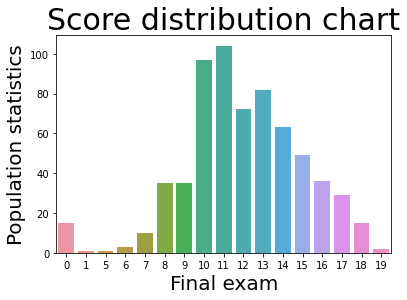

In [3]:

grade_distribution = sns.countplot(df['G3']) 
grade_distribution.set_title('Score distribution chart', fontsize=30) 
grade_distribution.set_xlabel('Final exam', fontsize=20) 
grade_distribution.set_ylabel('Population statistics', fontsize=20) 
plt.show() 


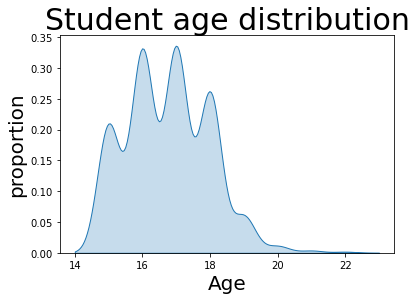

In [4]:
age_distribution = sns.kdeplot(df['age'], shade=True) 
age_distribution.axes.set_title('Student age distribution', fontsize=30) 
age_distribution.set_xlabel('Age', fontsize=20) 
age_distribution.set_ylabel('proportion', fontsize=20) 
plt.show() 


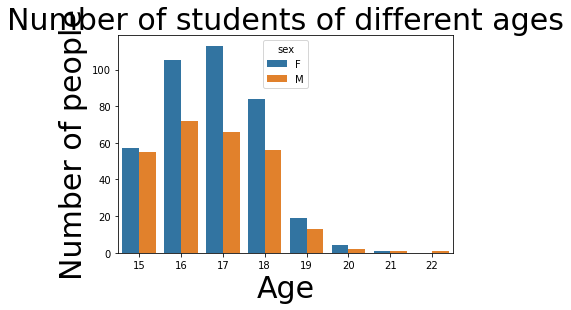

In [5]:
age_distribution_sex = sns.countplot('age', hue='sex', data=df) 
age_distribution_sex.axes.set_title('Number of students of different ages', fontsize=30) 
age_distribution_sex.set_xlabel('Age', fontsize=30) 
age_distribution_sex.set_ylabel('Number of people', fontsize=30) 
plt.show() 


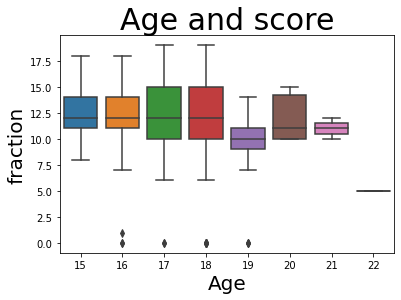

In [6]:
age_grade_boxplot = sns.boxplot(x='age', y='G3', data=df) 
age_grade_boxplot.axes.set_title('Age and score', fontsize = 30) 
age_grade_boxplot.set_xlabel('Age', fontsize = 20) 
age_grade_boxplot.set_ylabel('fraction', fontsize = 20) 
plt.show() 


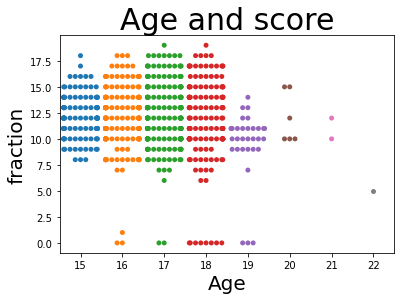

In [7]:
age_grade_swarmplot = sns.swarmplot(x='age', y='G3', data=df) 
age_grade_swarmplot.axes.set_title('Age and score', fontsize = 30) 
age_grade_swarmplot.set_xlabel('Age', fontsize = 20) 
age_grade_swarmplot.set_ylabel('fraction', fontsize = 20) 
plt.show() 


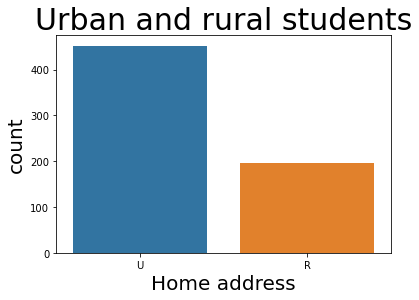

In [8]:
#Counting of urban and rural students

areas_countplot = sns.countplot(df['address']) 
areas_countplot.axes.set_title('Urban and rural students', fontsize = 30) 
areas_countplot.set_xlabel('Home address', fontsize = 20) 
areas_countplot.set_ylabel('count', fontsize = 20) 
plt.show() 


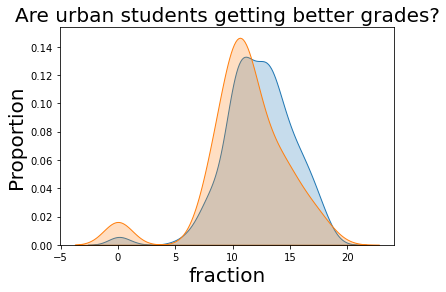

In [9]:
sns.kdeplot(df.loc[df['address'] == 'U', 'G3'], label='Urban', shade = True) 
sns.kdeplot(df.loc[df['address'] == 'R', 'G3'], label='Rural', shade = True) 
plt.title('Are urban students getting better grades?', fontsize = 20) 
plt.xlabel('fraction', fontsize = 20) 
plt.ylabel('Proportion', fontsize = 20) 
plt.show() 


In [10]:
df.corr()['G3'].sort_values()

failures     -0.393316
Dalc         -0.204719
Walc         -0.176619
traveltime   -0.127173
freetime     -0.122705
age          -0.106505
health       -0.098851
absences     -0.091379
goout        -0.087641
famrel        0.063361
Fedu          0.211800
Medu          0.240151
studytime     0.249789
G3            1.000000
Name: G3, dtype: float64

In [11]:
categorical_columns = df.columns[df.dtypes==object].tolist()
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
hot = ohe.fit_transform(df[categorical_columns])
hot_df = pd.DataFrame(hot.toarray())
hot_df.head()
cold_df = df.select_dtypes(exclude=["object"])
cold_df.head()
from scipy.sparse import csr_matrix
cold = csr_matrix(cold_df)
from scipy.sparse import hstack
final_sparse_matrix = hstack((hot, cold))
final_df = pd.DataFrame(final_sparse_matrix.toarray())
final_df.head()

,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,51,52,53,54,55,56
0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,2.0,0.0,4.0,3.0,4.0,1.0,1.0,3.0,4.0,11.0
1,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,2.0,0.0,5.0,3.0,3.0,1.0,1.0,3.0,2.0,11.0
2,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,2.0,0.0,4.0,3.0,2.0,2.0,3.0,3.0,6.0,12.0
3,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,3.0,0.0,3.0,2.0,2.0,1.0,1.0,5.0,0.0,14.0
4,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,2.0,0.0,4.0,3.0,2.0,1.0,2.0,5.0,0.0,13.0


In [12]:
final_df[56]

0      11.0
1      11.0
2      12.0
3      14.0
4      13.0
       ... 
644    10.0
645    16.0
646     9.0
647    10.0
648    11.0
Name: 56, Length: 649, dtype: float64

0      11.0
1      11.0
2      12.0
3      14.0
4      13.0
       ... 
644    10.0
645    16.0
646     9.0
647    10.0
648    11.0
Name: 56, Length: 649, dtype: float64

In [14]:
# creat model
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.model_selection import  train_test_split
from sklearn.metrics import accuracy_score,mean_squared_error
import statsmodels.api as sm
X = final_df.iloc[:,:-1]
Y = final_df.iloc[:,-1]
#Divide the data into training set and test set according to the proportion of 8:2。
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

model = LinearRegression() #LinearRegression()
model.fit(X_train,Y_train)
Y_pred = model.predict(X_test)
# print('Coefficients:'+str(regr.coef_))
# print('Constant term K0：'+str(regr.intercept_))
X2=sm.add_constant(X_train)
# X2
est =sm.OLS(Y_train,X2).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     56   R-squared:                       0.376
Model:                            OLS   Adj. R-squared:                  0.325
Method:                 Least Squares   F-statistic:                     7.385
Date:                Wed, 02 Nov 2022   Prob (F-statistic):           1.29e-29
Time:                        18:34:19   Log-Likelihood:                -1242.0
No. Observations:                 519   AIC:                             2564.
Df Residuals:                     479   BIC:                             2734.
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9265      0.269      3.449      0.001       0.399       1.454
0              0.9924      0.201      4.943      0.000       0.598       1.387
1             -0.0659      0.213     -0.310      0.757      -0.485       0.353
2              0.7895      0.200      3.942      0.000       0.396       1.183
3              0.1370      0.198      0.692      0.489      -0.252       0.526
4              0.3275      0.207      1.584      0.114      -0.079       0.734
5              0.5990      0.203      2.948      0.003       0.200       0.998
6              0.3332      0.189      1.762      0.079      -0.038       0.705
7              0.5933      0.199      2.985      0.003       0.203       0.984
8              0.4584      0.248      1.846      0.066      -0.030       0.946
9              0.4681      0.248      1.888      0.060      -0.019       0.955
10            -0.3337      0.324     -1.030      0.303      -0.970       0.303
11             0.7760      0.410      1.895      0.059      -0.029       1.581
12            -0.1987      0.243     -0.818      0.414      -0.676       0.279
13             0.0559      0.273      0.205      0.838      -0.480       0.591
14             0.6270      0.387      1.620      0.106      -0.134       1.388
15             0.4901      0.441      1.112      0.267      -0.376       1.356
16            -0.1097      0.588     -0.187      0.852      -1.266       1.046
17             0.1693      0.266      0.637      0.524      -0.353       0.691
18            -0.3251      0.284     -1.144      0.253      -0.883       0.233
19             0.7019      0.491      1.429      0.154      -0.263       1.667
20             0.2375      0.208      1.142      0.254      -0.171       0.646
21             0.3025      0.243      1.245      0.214      -0.175       0.780
22            -0.1362      0.322     -0.423      0.673      -0.769       0.497
23             0.5227      0.268      1.953      0.051      -0.003       1.049
24             0.5924      0.266      2.226      0.026       0.069       1.115
25             0.1483      0.229      0.649      0.517      -0.301       0.598
26             0.1858      0.450      0.412      0.680      -0.699       1.071
27             1.0620      0.258      4.122      0.000       0.556       1.568
28            -0.1355      0.244     -0.556      0.578      -0.614       0.343
29             0.5104      0.198      2.577      0.010       0.121       0.899
30             0.4161      0.182      2.292      0.022       0.059       0.773
31             0.6202      0.288      2.156      0.032       0.055       1.185
32             0.3063      0.327      0.935      0.350      -0.337       0.950
33             0.2991      0.191      1.565      0.118      -0.076       0.675
34             0.6274      0.185      3.388      0.001       0.263       0.991
35

In [15]:
# Calculate the accuracy of prediction
MSE = mean_squared_error(Y_test, Y_pred)
RMSE = MSE**0.5
print('MSE is:',MSE)
print('RMSE is:',RMSE)

MSE is: 5.737097453727172
RMSE is: 2.3952238838420037


In [459]:
from sklearn.base import TransformerMixin
class NullValueImputer(TransformerMixin):
    def __init__(self):
        None
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        for column in X.columns.tolist():
            if column in X.columns[X.dtypes==object].tolist():
                X[column] = X[column].fillna(X[column].mode())
            else:        
                X[column]=X[column].fillna(-999.0)
        return X
class SparseMatrix(TransformerMixin):
    def __init__(self):
        None
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        categorical_columns= X.columns[X.dtypes==object].tolist()
        ohe = OneHotEncoder()
        hot = ohe.fit_transform(X[categorical_columns])
        cold_df = X.select_dtypes(exclude=["object"])
        cold = csr_matrix(cold_df)
        final_sparse_matrix = hstack((hot, cold))
        final_csr_matrix = final_sparse_matrix.tocsr()
        return final_csr_matrix
sm = SparseMatrix().fit_transform(nvi)
print(sm)
# df = pd.read_csv('./student-por.csv', sep=';')
# nvi = NullValueImputer().fit_transform(df)
# nvi.head()

  (0, 0)	1.0
  (0, 2)	1.0
  (0, 5)	1.0
  (0, 6)	1.0
  (0, 8)	1.0
  (0, 10)	1.0
  (0, 19)	1.0
  (0, 20)	1.0
  (0, 25)	1.0
  (0, 28)	1.0
  (0, 29)	1.0
  (0, 31)	1.0
  (0, 33)	1.0
  (0, 36)	1.0
  (0, 38)	1.0
  (0, 39)	1.0
  (0, 41)	1.0
  (0, 43)	18.0
  (0, 44)	4.0
  (0, 45)	4.0
  (0, 46)	2.0
  (0, 47)	2.0
  (0, 49)	4.0
  (0, 50)	3.0
  (0, 51)	4.0
  :	:
  (648, 20)	1.0
  (648, 25)	1.0
  (648, 27)	1.0
  (648, 29)	1.0
  (648, 31)	1.0
  (648, 33)	1.0
  (648, 35)	1.0
  (648, 38)	1.0
  (648, 40)	1.0
  (648, 41)	1.0
  (648, 43)	18.0
  (648, 44)	3.0
  (648, 45)	2.0
  (648, 46)	3.0
  (648, 47)	1.0
  (648, 49)	4.0
  (648, 50)	4.0
  (648, 51)	1.0
  (648, 52)	3.0
  (648, 53)	4.0
  (648, 54)	5.0
  (648, 55)	4.0
  (648, 56)	10.0
  (648, 57)	11.0
  (648, 58)	11.0


In [460]:
sm_df = pd.DataFrame(sm.toarray())
sm_df.head()

,0,1,2,3,4,5,6,7,8,9,...,49,50,51,52,53,54,55,56,57,58
0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,4.0,3.0,4.0,1.0,1.0,3.0,4.0,0.0,11.0,11.0
1,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,5.0,3.0,3.0,1.0,1.0,3.0,2.0,9.0,11.0,11.0
2,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,4.0,3.0,2.0,2.0,3.0,3.0,6.0,12.0,13.0,12.0
3,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,3.0,2.0,2.0,1.0,1.0,5.0,0.0,14.0,14.0,14.0
4,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,4.0,3.0,2.0,1.0,2.0,5.0,0.0,11.0,13.0,13.0


In [461]:
df = pd.read_csv(addr, sep=';')
y = df.iloc[:, -1]
X = df.iloc[:, :-3]

In [462]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)
from sklearn.pipeline import Pipeline
data_pipeline = Pipeline([('null_imputer', NullValueImputer()), ('sparse', SparseMatrix())])
X_train_transformed = data_pipeline.fit_transform(X_train)

import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error as MSE
from xgboost import XGBRegressor

In [463]:
kfold = KFold(n_splits=5, shuffle=True, random_state=2)
def cross_val(model):
    scores = cross_val_score(model, X_train_transformed,y_train,scoring='neg_mean_squared_error', cv=kfold)
    rmse = (-scores.mean())
    return rmse
cross_val(XGBRegressor(missing=-999.0))

8.902400603917368

In [464]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_train_transformed, y_train, random_state=2)
def n_estimators(model):
    eval_set = [(X_test_2, y_test_2)]
    eval_metric="rmse"
    model.fit(X_train_2, y_train_2, eval_metric=eval_metric, eval_set=eval_set, early_stopping_rounds=100)
    y_pred = model.predict(X_test_2)
    rmse = MSE(y_test_2, y_pred)**0.5
    return rmse  
n_estimators(XGBRegressor(n_estimators=5000, missing=-999.0))

[0]	validation_0-rmse:8.49176
[1]	validation_0-rmse:6.31389
[2]	validation_0-rmse:4.97727
[3]	validation_0-rmse:4.16009
[4]	validation_0-rmse:3.66768
[5]	validation_0-rmse:3.42965
[6]	validation_0-rmse:3.28449
[7]	validation_0-rmse:3.18376
[8]	validation_0-rmse:3.15987
[9]	validation_0-rmse:3.16607
[10]	validation_0-rmse:3.16598
[11]	validation_0-rmse:3.13184
[12]	validation_0-rmse:3.13545
[13]	validation_0-rmse:3.13216
[14]	validation_0-rmse:3.13269
[15]	validation_0-rmse:3.13169
[16]	validation_0-rmse:3.10129
[17]	validation_0-rmse:3.10436
[18]	validation_0-rmse:3.10149
[19]	validation_0-rmse:3.10756
[20]	validation_0-rmse:3.10326
[21]	validation_0-rmse:3.09872
[22]	validation_0-rmse:3.09888
[23]	validation_0-rmse:3.09904
[24]	validation_0-rmse:3.10572
[25]	validation_0-rmse:3.10126
[26]	validation_0-rmse:3.09657
[27]	validation_0-rmse:3.09536
[28]	validation_0-rmse:3.09664
[29]	validation_0-rmse:3.09789
[30]	validation_0-rmse:3.09803
[31]	validation_0-rmse:3.09336
[32]	validation_0-

3.093361208225006

In [465]:
def grid_search(params, reg=XGBRegressor(missing=-999.0)):
    grid_reg = GridSearchCV(reg, params, scoring='neg_mean_squared_error', cv=kfold)
    grid_reg.fit(X_train_transformed, y_train)
    best_params = grid_reg.best_params_
    print("Best params:", best_params)
    best_score = np.sqrt(-grid_reg.best_score_)
    print("Best score:", best_score)
grid_search(params={'max_depth':[1, 2, 3, 4, 6, 7, 8],
                    'n_estimators':[31]})

Best params: {'max_depth': 1, 'n_estimators': 31}
Best score: 2.664346624021849


In [466]:
grid_search(params={'max_depth':[1, 2, 3],
                    'min_child_weight':[1,2,3,4,5],
                    'n_estimators':[31]})

Best params: {'max_depth': 1, 'min_child_weight': 1, 'n_estimators': 31}
Best score: 2.664346624021849


In [467]:
grid_search(params={'max_depth':[2],
                    'min_child_weight':[2,3],
                    'subsample':[0.5, 0.6, 0.7, 0.8, 0.9],
                   'n_estimators':[31, 50]})

Best params: {'max_depth': 2, 'min_child_weight': 2, 'n_estimators': 31, 'subsample': 0.9}
Best score: 2.6802593850696446


In [468]:
grid_search(params={'max_depth':[1],
                    'min_child_weight':[3],
                    'subsample':[.8],
                    'colsample_bytree':[0.9],
                    'colsample_bylevel':[0.6, 0.7, 0.8, 0.9, 1],
                    'colsample_bynode':[0.6, 0.7, 0.8, 0.9, 1],
                    'n_estimators':[50]})

Best params: {'colsample_bylevel': 0.9, 'colsample_bynode': 0.8, 'colsample_bytree': 0.9, 'max_depth': 1, 'min_child_weight': 3, 'n_estimators': 50, 'subsample': 0.8}
Best score: 2.6580042192772684


In [469]:
X_test_transformed = data_pipeline.fit_transform(X_test)
model = XGBRegressor(max_depth=1,
                       min_child_weight=5,
                       subsample=0.6,
                       colsample_bytree=0.9,
                       colsample_bylevel=0.9,
                       colsample_bynode=0.8,
                       n_estimators=50,
                       missing=-999.0)

model.fit(X_train_transformed, y_train)
y_pred = model.predict(X_test_transformed)
rmse = MSE(y_pred, y_test)**0.5
rmse

2.797385738184272